# CEM Notebook Example - Lalonde Dataset
Here we provide a notebook example illustrating the usage of the CEM package with the Lalonde dataset.


In [11]:
from CEM_LinearInf.balance import balance
from CEM_LinearInf.cem import cem
from CEM_LinearInf.data_generation import data_generation
from CEM_LinearInf.inference import inference
from CEM_LinearInf.sensitivity_analysis import *

## 1. Data preperation

The first step to prepare our dataset, and we use the Lalonde dataset here (Lalonde, R. 1986).

The study looked at the effectiveness of a job training program (the treatment) on the real earnings of an individual, a couple years after completion of the program.

Lalonde dataset is a data frame with 614 observations, examining the impact of a job training program (referred to as the treatment) on the actual earnings of an individual.
There are 185 treated and 429 control subjects, and 10 variables. The treatment assignment indicator is the first variable of the data frame: treatment (1 = treated; 0 = control). The next 7 columns are the covariates:

- **age**: continuous, measured in years;

- **education**: continuous, measured in years;

- **black**: categorical, indicating race (1 if black, 0 otherwise);

- **hispanic**: categorical, indicating race (1 if Hispanic, 0 otherwise);

- **married**: categorical, indicating marital status (1 if married, 0 otherwise);

- **nodegree**: categorical, indicating high school diploma (1 if no degree, 0 otherwise);

- **re74**: continuous, real earnings in 1974;

- **re75**: continuous, real earnings in 1975.

The last variable of the data frame is **re78**, the real the earnings in 1978.

**Reference**

- Dehejia, R., and Wahba, S. (1999), "Causal Effects in Nonexperimental Studies: Reevaluating the Evaluation of Training Programs," Journal of the American Statistical Association, 94, 1053-1062.

- Lalonde, R. (1986), "Evaluating the Econometric Evaluations of Training Programs," American Economic Review, 76, 604-620.

- https://search.r-project.org/CRAN/refmans/designmatch/html/lalonde.html

In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/lalonde.csv').iloc[:, 1:]
df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,1,33,8,1,0,0,1,0.0,0.0,289.7899


## 2. Coarsened Exact Matching (CEM)
**CEM** is a data preprocessing algorithm in causal inference that has a broad applicability to **observational data**.  

When conducting CEM, each sample is represented by confounder properties coarsened to discrete values using a coarsening or binning strategy. Thus each sample is given a “**BIN Signature**” and samples with **exactly the same** signature will be matched in the same group.

In this package, you can also conduct 1-k matching based on the CEM. Inspired by the K Nearest Neighbor Algorithm, in the same strata, a treated sample will be matched with k controled samples having nearest distance or propensity score with it.

With CEM, you can construct your observational data into 'quasi' experimental data easily, mitigating the model dependency, bias, and inefficiency of your estimation of the treatment effect (Ho, Imai, King, & Stuart 2007).

**Reference**

- Daniel Ho, Kosuke Imai, Gary King, and Elizabeth Stuart. (2007). “Matching as Nonparametric Preprocessing for Reducing Model Dependence in Parametric Causal Inference.” Political Analysis, 15, Pp. 199–236. Copy at https://tinyurl.com/y4xtv32s


Firstly you should create your own `cem` , giving it your dataframe, column names of confounders, continuous confounders, result variable **re78** and treatment variable **treat**.

In [13]:
confounder_cols = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree']
cont_confounder_cols = ['age', 'educ']
my_cem = cem(df = df, # dataframe to be matched
             confounder_cols = confounder_cols, # list of confounders' column names
             cont_confounder_cols = cont_confounder_cols, # list of continuous confounders' column names
             col_y = 're78', # column name of result variable
             col_t = 'treat' # column name of treatment variable
             )

The summary of the simulated dataframe is as follows.   
 Before matching the ***estimated ATT*** (Average Treatment Effect on Treated) is -635.0262 with p-value equals to 0.3342, which is far from the ***true ATT*** 1800 and is not reliable.

In [8]:
my_cem.summary()

Descriptive Statistics of the dataframe:

          treat       age      educ     black    hispan   married  nodegree  \
count  614.0000  614.0000  614.0000  614.0000  614.0000  614.0000  614.0000   
mean     0.3013   27.3632   10.2687    0.3958    0.1173    0.4153    0.6303   
std      0.4592    9.8812    2.6283    0.4894    0.3220    0.4932    0.4831   
min      0.0000   16.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
25%      0.0000   20.0000    9.0000    0.0000    0.0000    0.0000    0.0000   
50%      0.0000   25.0000   11.0000    0.0000    0.0000    0.0000    1.0000   
75%      1.0000   32.0000   12.0000    1.0000    0.0000    1.0000    1.0000   
max      1.0000   55.0000   18.0000    1.0000    1.0000    1.0000    1.0000   

              re74         re75         re78  
count     614.0000     614.0000     614.0000  
mean    4,557.5466   2,184.9382   6,792.8345  
std     6,477.9645   3,295.6790   7,470.7308  
min         0.0000       0.0000       0.0000  
25%        

Then we can try matching your dataset using `match` function with default parameters.  
After the default coarsened exact matching, 63.24% treated samples are matched.

In [15]:
my_cem.match()

Matching result

   all  matched  propotion
0  429      154     0.3590
1  185      117     0.6324



,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,coarsen_age,coarsen_educ,weight
1,1,22,9,0,1,0,1,0.0,0.0,3595.894,1,5,1.000000
2,1,30,12,1,0,0,0,0.0,0.0,24909.450,3,7,1.000000
3,1,27,11,1,0,0,1,0.0,0.0,7506.146,3,6,1.000000
5,1,22,9,1,0,0,1,0.0,0.0,4056.494,1,5,1.000000
6,1,23,12,1,0,0,0,0.0,0.0,0.000,1,7,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0,51,4,1,0,0,1,0.0,0.0,0.000,9,2,1.316239
606,0,16,9,0,0,0,1,0.0,0.0,5551.819,0,5,0.131624
607,0,27,10,1,0,0,1,0.0,0.0,7543.794,3,6,13.162393
609,0,18,11,0,0,0,1,0.0,0.0,10150.500,0,6,0.109687


## 3. Balance Checking
When we finish the coarsened exact matching, it is necessary to evaluate the quality of the matching
with balance checking methods.  
When the covariate balance is achieved, the resulting effect estimate is less sensitive to model misspecification and ideally close to true treatment effect (Greifer, 2023).  

---


The imbalance checking methods provided include:


*   'L1': Calculate and return the L1 imbalance score.
*   'smd': Print the standardized mean difference summary table and plots of confounders.
* 'ks': Plot Kolmogorov-Smirnov Statistics of confounders before and after matching.
* 'density': Return density plots of confounders before and after matching.
* 'ecdf': Return empirical cumulative density plots of confounders before and after matching.

**Reference**

- Greifer N (2023). cobalt: Covariate Balance Tables and Plots. https://github.com/ngreifer/cobalt.

Firstly you should create your own `balance` instance, giving it your matched dataframe, original dataframe, column names of confounders, continuous confounders, result variable ***re78*** and treatment variable ***treat***.

Let's check the L1 imbalance score after CEM with default coarsen parameters.

In [16]:
my_balance = balance(df_match = my_cem.matched_df, # matched dataframe
                     df_all = my_cem.df, # original dataframe
                     confounder_cols = my_cem.confounder_cols, # list of column names of confounders
                     cont_confounder_cols = my_cem.cont_confounder_cols, # list of column names of continuous confounders
                     col_y = 're78', # column name of result variable
                     col_t = 'treat') # column name of treatment variable

l1_before, l1_after = my_balance.balance_assessing(method = 'L1')

L1 imbalance score before matching: 0.7775

L1 imbalance score after matching: 0.4846



Moreover, we can customize our coarsen schema to optimize our matching result.  

---

**Method 1:**
You can input a schema dictionary indicating how to coarsen each continuous confounders ***X*** if you have a thorough understanding on your dataset.

The following cutting method can be chosen.
* `cut`: Bin values into discrete intervals with the same length.
* `qcut`: Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
* `struges`: Bin values into discrete intervals with the same length k according to the Sturges' rule.

**Method 2:**
You can also use the `tunning_schema` function to help you tune the coarsen schema automatically.  
The matched result with a suitable coarsen schema will have smaller L1 imbalance score and more matched samples.


Here we show the example of `tunning_schema`. Comparing with default coarsen schema, the L1 imbalance score after matching with tuned schema decreases from 0.4846 to 0.4372.

Matching result

   all  matched  propotion
0  429      146     0.3403
1  185      114     0.6162

L1 imbalance score before matching: 0.7619

L1 imbalance score after matching: 0.4372

-------------------------

SMD Result

Balance measures

          Treated Mean  Control Mean     SMD Variance Ratio  \
age            24.8333       25.1079 -0.0323         0.7514   
educ           10.6579       10.6566  0.0007         0.8947   
black           0.8509        0.8509 -0.0000              .   
hispan          0.0263        0.0263  0.0000              .   
married         0.0965        0.0965  0.0000              .   
nodegree        0.6053        0.6053 -0.0000              .   

         SMD.Threshold(<0.1) Var.Threshold(<2)  
age                 Balanced          Balanced  
educ                Balanced          Balanced  
black               Balanced                 .  
hispan              Balanced                 .  
married             Balanced                 .  
nodegree            B

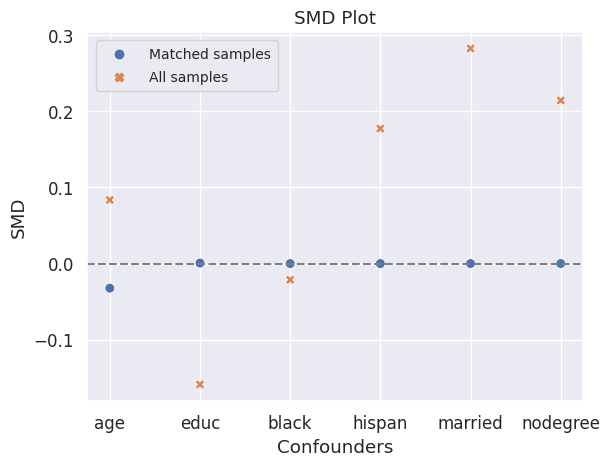

-------------------------

KS Result



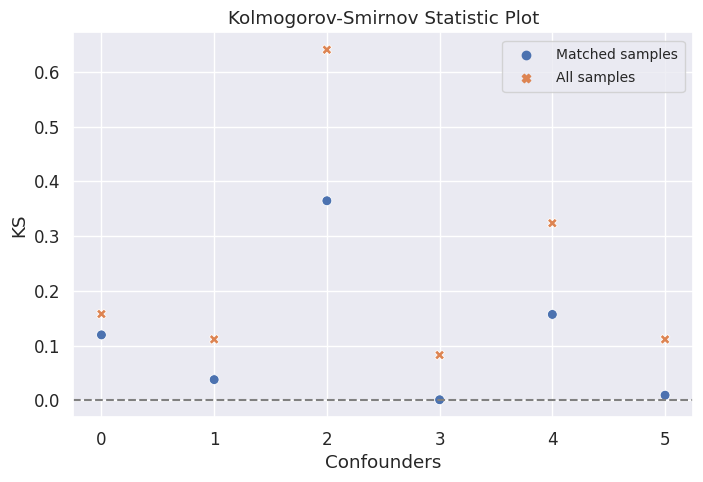

-------------------------

Density Plot



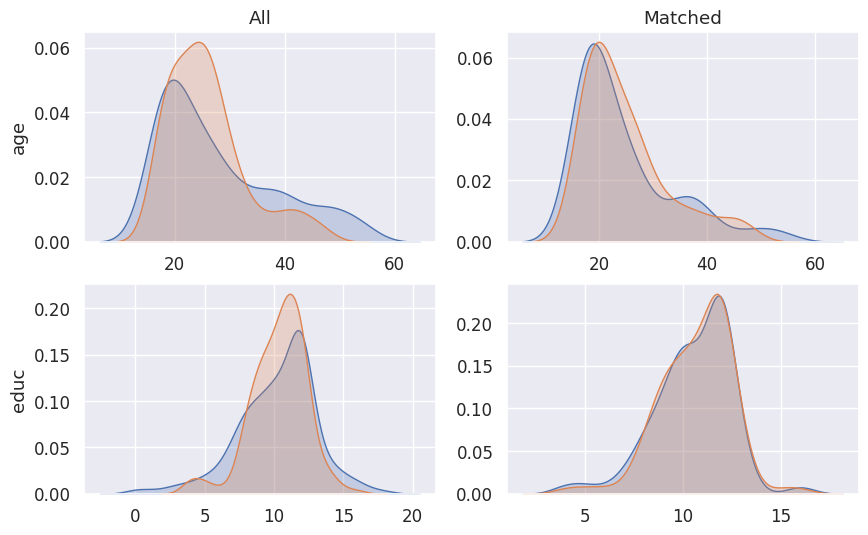

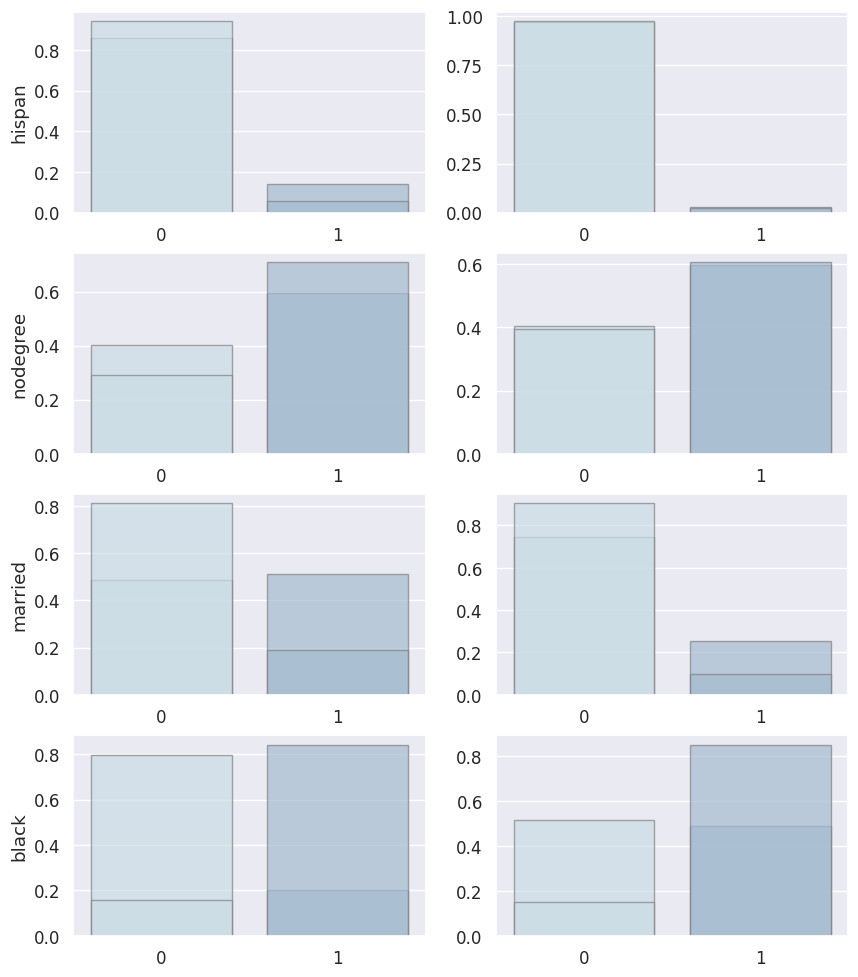

-------------------------

ECDF Plot



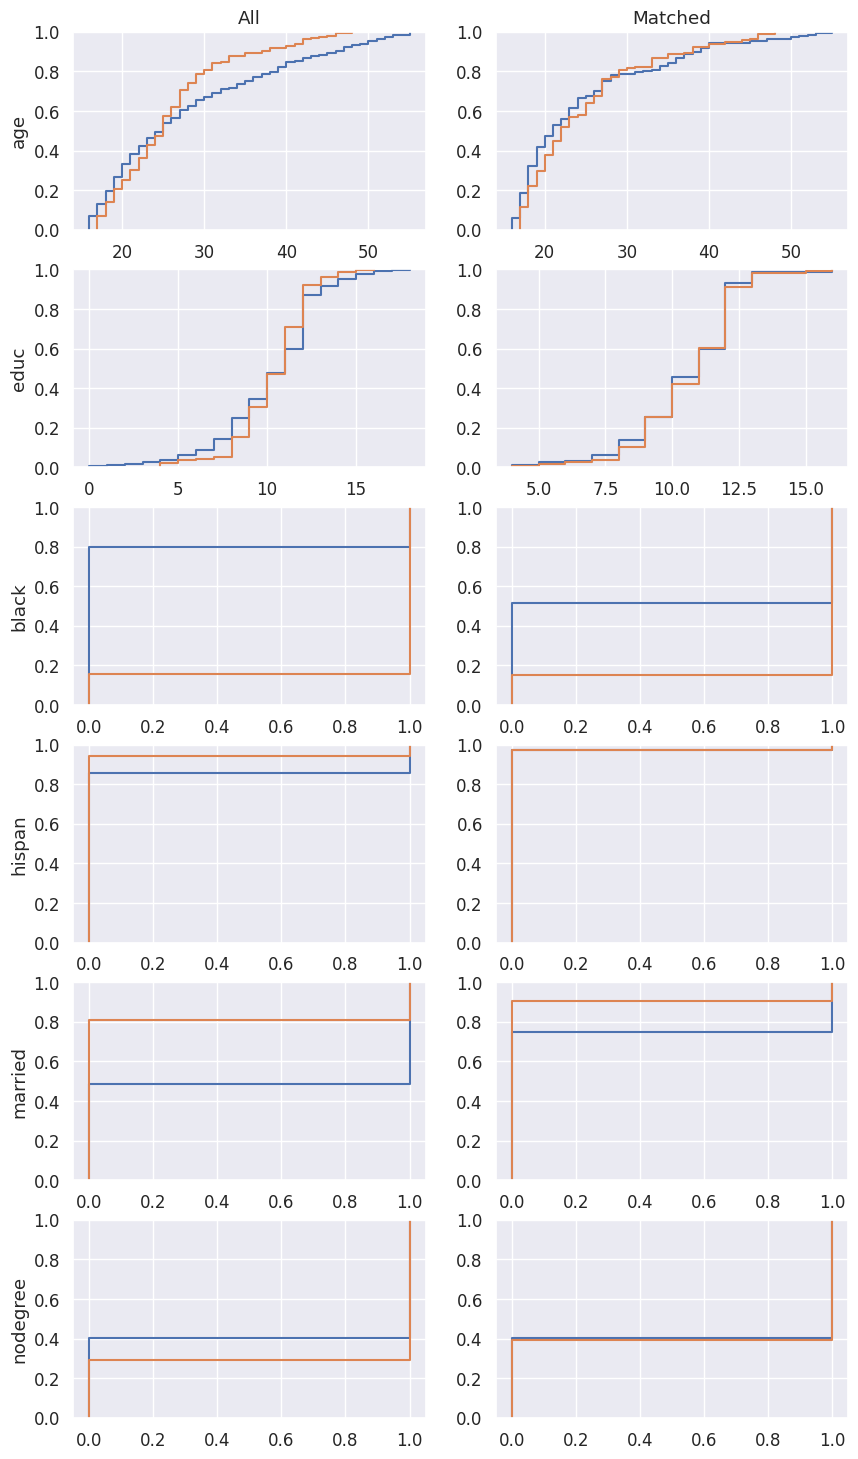

In [18]:
l1, schema = my_cem.tunning_schema(step = 2)
my_cem.match(schema = schema)
my_balance = balance(my_cem.matched_df, my_cem.df, my_cem.confounder_cols, my_cem.cont_confounder_cols, col_y = 're78', col_t = 'treat')
my_balance.balance_assessing(method = 'all')

## 4. Treatment Effect Inference
After conducting the coarsened exact matching and imbalance checking, we can estimate the ***average treatment effect ATT*** and ***heterogeneous treatment effect HTE*** with statistical inference methods.


---

* Ordinal least square linear regression method `linear_att` and weighted least square linear regression method `weighted_linear_att` are provided for the ATT estimation.
$$Y = \hat{\theta}T + \hat{\beta}X + ϵ \tag{1}$$
$$\widehat{ATT} = \hat{\theta} \tag{2}$$

* Linear double machine learning method (Chernozhukov et al. 2017) `linear_dml_hte` is provided for the HTE estimation.
$$Y^{\bot X} = Y - \hat{\beta_1}X \tag{1}$$
$$T^{\bot X} = T - \hat{\beta_2}X \tag{2}$$\
$$Y_i^{\bot X} = \widehat{\theta(X_i)}T^{\bot X} + ϵ \tag{3}$$
$$\widehat{HTE} = \widehat{\theta(X_i)} \tag{4}$$
$$\widehat{CATE} = E{\widehat{\theta(X_i)}} \tag{5}$$

**Reference**
- Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2017). Double/debiased machine learning for treatment and causal parameters.



Firstly you should create your own `inference` instance, giving it your matched dataframe,  column names of result variable ***re78***, treatment variable ***treat***, control variables, and confounders.

With the weighted linear regression method and linear double machine learning method, the estimated ***ATT*** and ***CATE*** are 661.9226, 1174.266 respectively, which are much better than -635.0262.

In [17]:
my_inf = inference(df = my_cem.matched_df, # matched dataframe
                   col_y = 're78', # column name of result variable
                   col_t = 'treat', # column name of treatment variable
                   col_x = ['re74', 're75'], # list of column names of control variables, please be noted that confounders should not be included in this list
                   confounder_cols = my_cem.confounder_cols) # list of column names of confounders

att = my_inf.weighted_linear_att()
print(f'att: {round(att, 4)}')
cate, hte, r2 = my_inf.linear_dml_hte()
print(f'cate: {round(cate, 4)}, r2:{round(r2, 4)}')

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            WLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.049
Date:                Wed, 30 Aug 2023   Prob (F-statistic):              0.107
Time:                        13:04:37   Log-Likelihood:                -2830.9
No. Observations:                 271   AIC:                             5670.
Df Residuals:                     267   BIC:                             5684.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5169.0557    601.703      8.591      0.0

## 5. Sensitivity Analysis
When we conduct causal inference to the observational data, the most important assumption is that there is no unobserved confounding.  
Therefore, after finishing the treatment effect estimation, investigators are advised to conduct the sensitivity analysis to **examine how fragile a result is against the possibility of unobserved confounders** (Cinelli, Hazlett, 2019).  
In other words, we should examine how strong the effect of unobserved confounders should be to erase the treatment effect estimated.


---
Two methods are provided in our package, including  **Omitted variable bias** based sensitivity analysis method (Cinelli, Hazlett, 2020) and **Wilcoxon's  signed rank test** based sensitivity analysis method (Rosenbaum, 2015).
* **Omitted variable bias** based sensitivity analysis method: This method can be used if your result variable ***Y*** is linearly dependent with ***X*** and ***T***.
* **Wilcoxon's  signed rank test** based sensitivity analysis method: It is suitable for 1-1 matched dataset, which means that only 1 untreated sample are matched with each treated sample, and this can be achieved by setting `k2k_ratio = 1` in the `match` step.

**Reference**

- Cinelli, C., & Hazlett, C. (2020). Making Sense of Sensitivity: Extending Omitted Variable Bias. Journal of the Royal Statistical Society Series B: Statistical Methodology, 82(1), 39–67. https://doi.org/10.1111/rssb.12348

- Rosenbaum, P. R. (2005). Sensitivity analysis in observational studies. Encyclopedia of statistics in behavioral science.

### 5.1 Omitted variable bias based sensitivity analysis

In the following example, we choose X2 as our benchmark variable. The analysis result gives us the following informations:

*   **Robustness Value (RV)**:  
It provides a convenient reference point to assess the overall robustness of a coefficient to unobserved confounders. If the confounder's association to the treatment $R_{Y\sim Z|T, X}^2$ and to
the outcome $R_{Z\sim T|X}^2$ are both assumed to be less than the ***RV***, then such confounders cannot “explain away” the observed effect.

*   **Contour Line**:  
The points on the same contour line has the same adjusted estimated ATT. The contour line helps us to know the value of the adjusted estimated ATT when $R_{Y\sim Z|T, X}^2 = a$ and $R_{Z\sim T|X}^2 = b$.

* **Bound the strength of the hidden confounder using observed covariate**:  
We can choose an observed confounder $X_j$ as a benchmark, and check the adjusted estimated ATT when
$$\frac{R_{Y\sim Z|T, X_{-j}}^2}{R_{Y\sim X_j|T, X_{-j}}^2} = K_Y \tag{1}$$
$$\frac{R_{T\sim Z|X_{-j}}^2}{R_{T\sim X_j|X_{-j}}^2} = K_T \tag{2}$$





,K_t,K_y,R2_Y,R2_T,Adjusted att
0,5,5,0.044,0.0271,367.2299


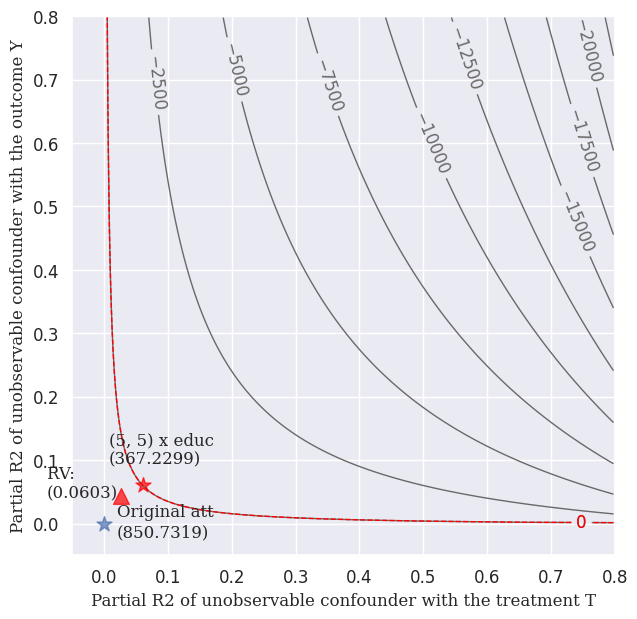

In [25]:
import statsmodels.api as sm

X = sm.add_constant(my_cem.matched_df[[my_cem.col_t] + ['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']])
y = np.asarray(my_cem.matched_df[my_cem.col_y])
model = sm.WLS(y.astype(float), X.astype(float), weights=1)

my_ovb = ovb(col_t='treat', model=model, bench_variable='educ', k_t = [5], k_y=[5],  measure = 'att')
my_ovb.plot_result()

### 5.2 Wilcoxon's signed rank test based sensitivity analysis

Wilcoxon's signed rank test based sensitivity analysis imagines that in the population before matching, all samples are assigned to treatment or control independently with unknown probabilities. However, two samples  with the same observed confounders
may nonetheless differ in terms of unobserved confounders, so that one sample has an odds of treatment that is up to $\Gamma$ ≥ 1 times greater than the odds for another sample.

The sensitivity analysis asks how large the $\Gamma$ should be to erase the treatment effect estimated.

Wilcoxon's signed rank test based sensitivity analysis is suitable for 1-1 matched dataset, therefore 1-1 matching needs to be conducted firstly. You can implement it simply by setting `k2k_ratio = 1`, and here we choose the propensity score to measure the similarity by setting `dist = 'psm'`.

The `wilcoxon` class function can give you a result table, which shows you the p-value intervals under each $\Gamma$.

In the following example, when $\Gamma$ = 3.00, the upper bound of the p-value's interval is greater than 0.05, which means that in this situation, we don’t have 95% confidence to reject the null hypothesis that the treatment is randomly assigned. In other words, when $\Gamma$ = 3.00 the estimated ATT will be explained away by unovserved confounders.

In [26]:
my_cem_k2k = cem(df, confounder_cols, cont_confounder_cols, col_y = 're78', # column name of result variable
             col_t = 'treat')
my_cem_k2k.match(k2k_ratio = 1, dist = 'psm')

my_sen = wilcoxon(df=my_cem_k2k.matched_df, pair = my_cem_k2k.pair, col_y='re78')
wilcoxon_df = my_sen.result([1, 2, 3, 4, 4.25, 5])

Matching result

   all  matched  propotion
0  429      117     0.2727
1  185      117     0.6324

       lower_p  upper_p
gamma                  
1.00       0.0   0.0000
2.00       0.0   0.0060
3.00       0.0   0.1773
4.00       0.0   0.5680
4.25       0.0   0.6562
5.00       0.0   0.8470
The estimated ATT result is not reliable if there exists an unobservable confounder which makes the magnitude of probability
that a single subject will be interfered with is 3.0 times higher than that of the other subject.
